# MP3 audio books for Children's classics

In [1]:
#libraries
library(tidyverse) # collection of packages
library(rvest) #rvest makes scraping easier
library(polite) # polite is the "polite" version of rvest
library(xml2) # makes it easier to work with HTML and XML from R
library(robotstxt) # it easy to check whether scrapers are allowed to access specific resources on a domain
library(magrittr) # better helps in piping
library(lubridate) # makes easier to work with dates and time
library(ggplot2) # helps in data visualisations 

-- Attaching packages --------------------------------------- tidyverse 1.3.1 --

v ggplot2 3.3.5     v purrr   0.3.4
v tibble  3.1.5     v dplyr   1.0.7
v tidyr   1.1.4     v stringr 1.4.0
v readr   2.0.2     v forcats 0.5.1

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


Attaching package: 'rvest'


The following object is masked from 'package:readr':

    guess_encoding




ERROR: Error in library(polite): there is no package called 'polite'


In [3]:
paths_allowed(
    paths = c("https://www.free-ebooks.net/children-classics-audiobooks")
    #if the output is TRUE then we can scrape the web page
    )

 www.free-ebooks.net                      





[1] TRUE

##### www.free-ebooks.net is a website having a huge collection of ebooks. These ebooks are of different categories and have different formats like pdf, ePub, Kindle, Txt and also in mp3(adio books). Here mp3 audiobooks for children classics is used for scraping the data. 

In [4]:
url <- "https://www.free-ebooks.net/children-classics-audiobooks"

In [5]:
#Read a webpage using read_html() from rvest, reads and parse the webpage into R
html_data <- read_html(url)

In [6]:
html_data %>% html_structure()
html_data

<html [lang]>
  <head>
    <link [rel, as, type, href, crossorigin]>
    <link [rel, as, type, href, crossorigin]>
    <link [rel, as, type, href, crossorigin]>
    <script>
      {cdata}
    {comment}
    <script>
      {cdata}
    {comment}
    <meta [charset]>
    <title>
      {text}
    <meta [name, content]>
    <link [rel, href, type]>
    <link [rel, sizes, href]>
    <link [rel, type, sizes, href]>
    <link [rel, type, sizes, href]>
    <link [rel, href]>
    <link [rel, href, color]>
    <link [rel, href]>
    <meta [name, content]>
    <meta [name, content]>
    <script [data-ad-client, async, src]>
    <script [async, src]>
    <meta [name, content]>
    {comment}
    <link [rel, href]>
    <script [type]>
      {cdata}
    <link [rel, href]>
    <meta [name, content]>
  <body>
    {text}
    {comment}
    {text}
    <noscript>
      <iframe [src, height, width, style]>
    {text}
    {comment}
    {text}
    <nav.topMain>
      <div.container>
        {text}
        <ul.h

{html_document}
<html lang="en-US">
[1] <head>\n<meta http-equiv="Content-Type" content="text/html; charset=UTF-8 ...
[2] <body>\n<!-- Google Tag Manager (noscript) -->\n<noscript><iframe src="ht ...

In [7]:
#html_nodes() is used to select the elements. Get the elements with class ".col-sm-20", period(.) denote a class  
audio_books <- html_data %>%
    html_nodes(".col-sm-20")
audio_books

{xml_nodeset (10)}
 [1] <div class="col-sm-20 mt10">\n\t\t<h3 class="tlc"><a href="/animal-adven ...
 [2] <div class="col-sm-20 mt10">\n\t\t<h3 class="tlc"><a href="/children-cla ...
 [3] <div class="col-sm-20 mt10">\n\t\t<h3 class="tlc"><a href="/adventures-a ...
 [4] <div class="col-sm-20 mt10">\n\t\t<h3 class="tlc"><a href="/adventures-a ...
 [5] <div class="col-sm-20 mt10">\n\t\t<h3 class="tlc"><a href="/adventures-a ...
 [6] <div class="col-sm-20 mt10">\n\t\t<h3 class="tlc"><a href="/adventures-a ...
 [7] <div class="col-sm-20 mt10">\n\t\t<h3 class="tlc"><a href="/adventures-a ...
 [8] <div class="col-sm-20 mt10">\n\t\t<h3 class="tlc"><a href="/adventures-a ...
 [9] <div class="col-sm-20 mt10">\n\t\t<h3 class="tlc"><a href="/adventures-a ...
[10] <div class="col-sm-20 mt10">\n\t\t<h3 class="tlc"><a href="/adventures-a ...

There are 10 Audio books in the webpage.

In [8]:
#html_text() extracts all the text inside the tags. str_squish() removes white space from both sides of the string
content <- audio_books %>%
    html_nodes(".padIt")%>%
    html_text() %>%
    str_squish()
content

[1] "F H Pritchard | Animal Adventures Rating: Rated: 6 times Format: Audiobook (MP3)"
 [2] "Published: Jun 2014 Downloads: 254 Duration: 7 hours"                            
 [3] "Arkadi Gaidar | Children Classics Rating: Rated: 2 times Format: Audiobook (MP3)"
 [4] "Published: Jun 2014 Downloads: 57 Duration: 1 hour 6 minutes"                    
 [5] "Rudyard Kipling | Adventures Rating: Rated: 0 times Format: Audiobook (MP3)"     
 [6] "Published: Jun 2014 Downloads: 89 Duration: 1 hour"                              
 [7] "Rudyard Kipling | Adventures Rating: Rated: 0 times Format: Audiobook (MP3)"     
 [8] "Published: Jun 2014 Downloads: 92 Duration: 1 hour 12 minutes"                   
 [9] "Rudyard Kipling | Adventures Rating: Rated: 1 times Format: Audiobook (MP3)"     
[10] "Published: Jun 2014 Downloads: 950 Duration: 1 hour 6 minutes"                   
[11] "Rudyard Kipling | Adventures Rating: Rated: 0 times Format: Audiobook (MP3)"     
[12] "Published: Jun 2014 Downloads: 109 Duration: 1 hour"                             
[13] "Rudyard Kipling | Adventures Rating: Rated: 1 times Format: Audiobook (MP3)"     
[14] "Published: Jun 2014 Downloads: 54 Duration: 1 hour 12 minutes"                   
[15] "Rudyard Kipling | Adventures Rating: Rated: 0 times Format: Audiobook (MP3)"     
[16] "Published: Jun 2014 Downloads: 53 Duration: 1 hour"                              
[17] "Rudyard Kipling | Adventures Rating: Rated: 0 times Format: Audiobook (MP3)"     
[18] "Published: Jun 2014 Downloads: 38 Duration: 1 hour"                              
[19] "Rudyard Kipling | Adventures Rating: Rated: 3 times Format: Audiobook (MP3)"     
[20] "Published: Jun 2014 Downloads: 2141 Duration: 11 hours 48 minutes"

In [9]:
#To extract from data from the first audio book [[1]]
audio_book <- audio_books[[1]]

### Transforming the data collected into relational data model (that is, one or more data frames).

In [10]:
#To extract the book name
book_name <- audio_book %>%
    html_node(".tlc")%>%
    html_text()%>%
    str_squish()
book_name

[1] "Fifty Stories from UNCLE REMUS"

In [11]:
#To extract the author name
author_name <- audio_book %>%
    html_node(".padIt a:nth-child(1)")%>%
    html_text() %>%
    str_squish()
author_name

[1] "F H Pritchard"

In [12]:
#To extract the category of book
book_type <- audio_book %>%
    html_node(".padIt a:nth-child(2)")%>%
    html_text() %>%
    str_squish()
book_type

[1] "Animal Adventures"

In [13]:
#To extract ratings of the book
ratings <- audio_book %>%
    html_node(".padIt")%>%
    html_node("span") %>% 
    html_attr("title") %>%
    trimws() %>%
    na.omit()
ratings

[1] "Rating: 3.5"

In [14]:
#substr() is used to extract only the number from the string and then converting it to a number format. 
ratings <- substr(ratings,8,12) %>% as.numeric
ratings

[1] 3.5

In [15]:
#To extract the number of times the book was rated 
rated <- audio_book %>%
    html_node(".padIt")%>%
    html_node("b:nth-child(9)") %>% 
    html_text() %>%
    na.omit()
rated

[1] "6 times"

In [16]:
rated<-substr(rated,1,2)%>%as.numeric
rated

[1] 6

In [17]:
format <- audio_book %>%
    html_node(".padIt b:nth-child(11)")%>%
    html_text() %>%
    str_squish()
format

[1] "Audiobook (MP3)"

In [18]:
#Pattern specified removes a string in the brackets
format_type <- stringr::str_extract(string = format, pattern = "(?<=\\().*(?=\\))")
format_type

[1] "MP3"

In [19]:
description <- audio_book %>%
    html_node(".book-description") %>%
    html_text() %>%
    str_squish()
description

[1] "A retelling of the famous Joel Chandler Harris's children stories of Brer Rabbit and Brer Fox. Adventures abound, amidst moral lessons."

In [20]:
#Number of times the Audio book was downloaded
downloads <- audio_book %>%
    html_node(".padIt b:nth-child(3)")%>%
    html_text() %>%
    as.numeric()
downloads

[1] 254

In [21]:
published <- audio_book %>%
    html_node(".padIt b:nth-child(1)")%>%
    html_text() 
published

[1] "Jun 2014"

In [22]:
duration <- audio_book %>%
    html_nodes(".padIt b:nth-child(5)")%>%
    html_text() %>%
    str_squish() 
duration

[1] "7 hours"

In [23]:
#duration is in the form of 7 hour 10 minutes, here 7 and 15 is split and combined with a separator ":"
#and then converted into proper time using as.POSIXct()
duration_hours <- as.integer(substr(duration, 1,2))
duration_mins <- as.integer(substr(duration, 7,9))
duration_mins[is.na(duration_mins)] <- 0 
duration <- strptime(paste(duration_hours, duration_mins, sep = ":"),
                     format = "%H:%M") 
duration <- paste(format(as.POSIXct(duration), format = "%H:%M"))
duration

Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"


[1] "07:00"

In [24]:
#author id is extracted by "a" node within that "href" attribute using html_attr()
author_id <- audio_book %>%
    html_node(".padIt a:nth-child(1)")%>%
    html_attr("href")
author_id   

[1] "/profile/642289/f-h-pritchard"

In [26]:
author_id <- substr(author_id,10,15) %>% as.numeric
author_id

[1] 642289

In [27]:
#All the individual elemts are stored in a tibble in the form of a relational data model.
tibble(book_name,
       book_type,
       ratings,
       rated,
       format_type,
       published,
       downloads,
       duration,
       description,
       author_id,
       author_name)

book_name,book_type,ratings,rated,format_type,published,downloads,duration,description,author_id,author_name
<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>
Fifty Stories from UNCLE REMUS,Animal Adventures,3.5,6,MP3,Jun 2014,254,07:00,"A retelling of the famous Joel Chandler Harris's children stories of Brer Rabbit and Brer Fox. Adventures abound, amidst moral lessons.",642289,F H Pritchard


In [28]:
#custom function to collect all the data related 10 audio books in the web page
parse_audio <- function(audio_book){
    book_name <- audio_book %>%
        html_node(".tlc")%>%
        html_text()%>%
        str_squish()
    author_id <- audio_book %>%
        html_node(".padIt a:nth-child(1)")%>%
        html_attr("href")
    author_id <- substr(author_id,10,15) %>% 
        as.numeric
    author_name <- audio_book %>%
        html_node(".padIt a:nth-child(1)")%>%
        html_text() %>%
        str_squish()
    book_type <- audio_book %>%
        html_node(".padIt a:nth-child(2)")%>%
        html_text() %>%
        str_squish()
    ratings <- audio_book %>%
        html_node(".padIt") %>%
        html_node("span") %>% 
        html_attr("title") %>%
        trimws() %>%
        na.omit() 
    ratings <- substr(ratings,8,12) %>%
        as.numeric
    rated <- audio_book %>%
        html_node(".padIt") %>%
        html_node("b:nth-child(9)") %>% 
        html_text() %>%
        na.omit() 
    rated <- substr(rated,1,2) %>% 
        as.numeric
    format <- audio_book %>%
        html_node(".padIt b:nth-child(11)")%>%
        html_text() %>%
        str_squish()
    format_type <- stringr::str_extract(string = format, pattern = "(?<=\\().*(?=\\))")
    description <- audio_book %>%
        html_node(".book-description") %>%
        html_text() %>%
        str_squish()
    downloads <- audio_book %>%
        html_node(".padIt b:nth-child(3)")%>%
        html_text() %>%
        as.numeric()
    published <- audio_book %>%
        html_node(".padIt b:nth-child(1)")%>%
        html_text()
    duration <- audio_book %>%
        html_node(".padIt b:nth-child(5)")%>%
        html_text() %>%
        str_squish()
    duration_hours <- as.integer(substr(duration, 1,2))
    duration_hours[is.na(duration_hours)] <- 0
    duration_mins <- as.integer(substr(duration, 7,9))
    duration_mins[is.na(duration_mins)] <- 0 
    duration <- strptime(paste(duration_hours, duration_mins, sep = ":"),
                         format = "%H:%M") 
    duration <- paste(format(as.POSIXct(duration), format = "%H:%M"))
    
    
    tibble(book_name,
           author_id,
           author_name,
           book_type,
           ratings,
           rated,
           format_type,
           published,
           downloads,
           duration,
           description)
}

In [29]:
#A dataframe is setup to store the results
df <- map_dfr(audio_books, parse_audio)
df

Warning message in .f(.x[[i]], ...):
"NAs introduced by coercion"
Warning message in .f(.x[[i]], ...):
"NAs introduced by coercion"


book_name,author_id,author_name,book_type,ratings,rated,format_type,published,downloads,duration,description
<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>
Fifty Stories from UNCLE REMUS,642289,F H Pritchard,Animal Adventures,3.50,6,MP3,Jun 2014,254,07:00,"A retelling of the famous Joel Chandler Harris's children stories of Brer Rabbit and Brer Fox. Adventures abound, amidst moral lessons."
Blue Cup,651082,Arkadi Gaidar,Children Classics,3.00,2,MP3,Jun 2014,57,01:06,"This short story initial describes a tale of family conflict and social injustice, but ends with a message of love and understanding."
White Seal,638726,Rudyard Kipling,Adventures,0.00,0,MP3,Jun 2014,89,01:00,"A story with a modern message of the plight of seals. A baby seal sees humans clubbing seals to death, so he swims the globe to find safety."
Undertakers,638726,Rudyard Kipling,Adventures,0.00,0,MP3,Jun 2014,92,01:12,"Find out what a man-eating mugger (crocodile), an adjutant crane, and a jackal talk about while relaxing on a river bank one evening."
Toomai of The Elephants,638726,Rudyard Kipling,Adventures,5.00,1,MP3,Jun 2014,950,01:06,"This is about a character from the Jungle Book, Toomai, an elephant handler. His adventures and life lessons unfold in this delightful tale."
Rikki-Tikki-Tavi,638726,Rudyard Kipling,Adventures,0.00,0,MP3,Jun 2014,109,01:00,"Of Jungle Book fame, Rikki-Tikki-Tavi the mongoose lives in India, where he defends a family against venomous cobras."
Quiquern,638726,Rudyard Kipling,Adventures,5.00,1,MP3,Jun 2014,54,01:12,"An Inuit tribe is in danger of starvation, so a young boy and girl lead a team to find food. They are aided by Quiquern, an 8-legged spirit."
Miracle of Purun Bhagat,638726,Rudyard Kipling,Adventures,0.00,0,MP3,Jun 2014,53,01:00,Non-Mowgli story from the Second Jungle Book
Her Majesty's Servants,638726,Rudyard Kipling,Adventures,0.00,0,MP3,Jun 2014,38,01:00,"A ""Jungle Book"" Adventure. Set in 1885 India in the Viceroy’s field camp. The story reveals the camp animals’ conversations about their work and an upcoming event."


#### Now it's the time to scrape everything else in the website. Turn the above tasks into a function and using `purrr` (and its `map_` functions, possibly in combination with `possibly`) apply that function to all the pages we are interested in; the output of the task is a relation dataset (i.e., one or more dataframes, and if more than one, explicit their relationships).

In [2]:
#To parse the data from all the pages, "{page}" a number is used to pass different page numbers. 
base_url <- "https://www.free-ebooks.net/children-classics-audiobooks/{page}"
page <- 1 #For sanity purposes 1 passed as a page number

In [3]:
#glue() from purr helps to remove all the white spaces and combines them.
#
url <- glue::glue(base_url)
url
Sys.sleep(10)#delays 10ms for safe scraping

https://www.free-ebooks.net/children-classics-audiobooks/1

In [4]:
html_data <- read_html(url)

In [5]:
#To check the total number of pages
total_pages<-html_data %>%
    html_node(".pages") %>%
    html_text() 
total_pages
total_pages<-str_remove(6,total_pages) %>% as.numeric
total_pages 

[1] "\n\t\t\t\tPage\n\t\t\t\t123456\n\t\t\t\tof 6\t\t\t"

[1] 6

In [34]:
#Looping through all the nodes and pages
options(warn=-1)#to stop the warning messages
audio_books_df <-
map_dfr(1:total_pages, function(page){
    url_page <- glue::glue(base_url)
    message(glue::glue("in {url_page}"))
    Sys.sleep(10)
    html_data <- read_html(url_page)
    audio_books <- html_data %>%
        html_nodes(".col-sm-20")
    df <- map_dfr(audio_books, parse_audio)
    df   
})
options(warn=0)#resets back the warning messages

in https://www.free-ebooks.net/children-classics-audiobooks/1

in https://www.free-ebooks.net/children-classics-audiobooks/2

in https://www.free-ebooks.net/children-classics-audiobooks/3

in https://www.free-ebooks.net/children-classics-audiobooks/4

in https://www.free-ebooks.net/children-classics-audiobooks/5

in https://www.free-ebooks.net/children-classics-audiobooks/6



In [35]:
audio_books_df

book_name,author_id,author_name,book_type,ratings,rated,format_type,published,downloads,duration,description
<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>
Fifty Stories from UNCLE REMUS,642289,F H Pritchard,Animal Adventures,3.50,6,MP3,Jun 2014,254,07:00,"A retelling of the famous Joel Chandler Harris's children stories of Brer Rabbit and Brer Fox. Adventures abound, amidst moral lessons."
Blue Cup,651082,Arkadi Gaidar,Children Classics,3.00,2,MP3,Jun 2014,57,01:06,"This short story initial describes a tale of family conflict and social injustice, but ends with a message of love and understanding."
White Seal,638726,Rudyard Kipling,Adventures,0.00,0,MP3,Jun 2014,89,01:00,"A story with a modern message of the plight of seals. A baby seal sees humans clubbing seals to death, so he swims the globe to find safety."
Undertakers,638726,Rudyard Kipling,Adventures,0.00,0,MP3,Jun 2014,92,01:12,"Find out what a man-eating mugger (crocodile), an adjutant crane, and a jackal talk about while relaxing on a river bank one evening."
Toomai of The Elephants,638726,Rudyard Kipling,Adventures,5.00,1,MP3,Jun 2014,950,01:06,"This is about a character from the Jungle Book, Toomai, an elephant handler. His adventures and life lessons unfold in this delightful tale."
Rikki-Tikki-Tavi,638726,Rudyard Kipling,Adventures,0.00,0,MP3,Jun 2014,109,01:00,"Of Jungle Book fame, Rikki-Tikki-Tavi the mongoose lives in India, where he defends a family against venomous cobras."
Quiquern,638726,Rudyard Kipling,Adventures,5.00,1,MP3,Jun 2014,54,01:12,"An Inuit tribe is in danger of starvation, so a young boy and girl lead a team to find food. They are aided by Quiquern, an 8-legged spirit."
Miracle of Purun Bhagat,638726,Rudyard Kipling,Adventures,0.00,0,MP3,Jun 2014,53,01:00,Non-Mowgli story from the Second Jungle Book
Her Majesty's Servants,638726,Rudyard Kipling,Adventures,0.00,0,MP3,Jun 2014,38,01:00,"A ""Jungle Book"" Adventure. Set in 1885 India in the Viceroy’s field camp. The story reveals the camp animals’ conversations about their work and an upcoming event."


#### Using graphics (via `ggplot`) to represent the data you collected in a meaningful way.

##### List of Audio books which are rated above average based on top 10 downloads and on different categories. From the graph it is evident that Audiobooks related to Adventures category has more books when compared with other two categories.

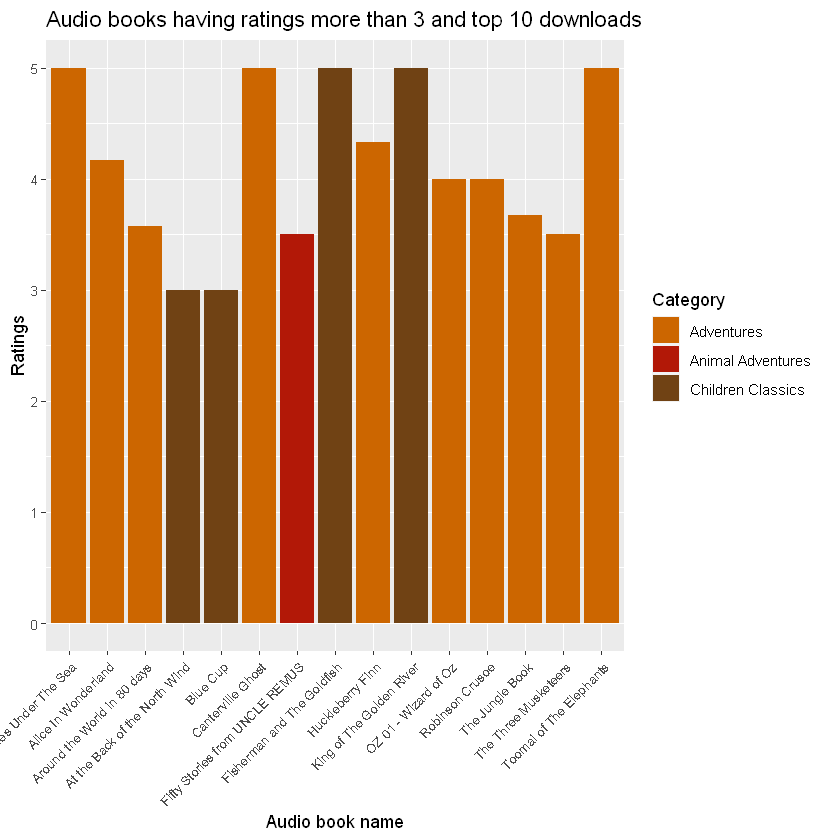

In [36]:
audio_books_df %>% filter(ratings >= 3) %>%
    group_by(book_type) %>%
    arrange(desc(downloads)) %>%
    slice(1:10) %>% 
    select(book_name, book_type, ratings, downloads) %>%
    ggplot(aes(x=book_name, 
                 y=ratings,
                 fill=book_type)) +
    geom_bar(stat="identity")+
    scale_fill_manual("Category", values=c("#CC6600","#B21807","#704214"))+
    ggtitle("Audio books having ratings more than 3 and top 10 downloads")+
    theme(axis.text = element_text(size=8))+
    theme(axis.text.x = element_text(angle=45, hjust=1))+
    xlab("Audio book name")+
    ylab("Ratings")

### APIs 

Identify a web service offering data through an API. Access the API using `httr` and collect the information you care about. Convert the data into a dataframe (or more than one). Represent it graphically in a meaningful way.

In [2]:
library("httr")
library("jsonlite")


Attaching package: 'jsonlite'


The following object is masked from 'package:purrr':

    flatten




In [3]:
# "httr" helps to make a request, then use GET() with url to get response 
# No query params or authentication headers are required for this API
url <- GET("https://jhucoronavirus.azureedge.net/jhucoronavirus/global_vaccines.json")

In [4]:
#A successful request has a status as 200 or else 404 or 403 for page not found and denied access
url

Response [https://jhucoronavirus.azureedge.net/jhucoronavirus/global_vaccines.json]
  Date: 2021-10-25 08:30
  Status: 200
  Content-Type: application/json
  Size: 22.6 kB


In [5]:
#headers(), http_status(), str(), content() are helper methods used to pull out important parts of the response
headers(url)

$`transfer-encoding`
[1] "chunked"

$`content-type`
[1] "application/json"

$`content-encoding`
[1] "gzip"

$`content-md5`
[1] "9Kaovgq8aXozVZexA+kMUQ=="

$`last-modified`
[1] "Mon, 25 Oct 2021 08:30:06 GMT"

$etag
[1] "0x8D99791A63E10DB"

$server
[1] "Windows-Azure-Blob/1.0 Microsoft-HTTPAPI/2.0"

$`x-cache`
[1] "TCP_MISS"

$`x-ms-request-id`
[1] "3891b22f-701e-0009-4e7a-c9d2b5000000"

$`x-ms-version`
[1] "2009-09-19"

$`x-ms-lease-status`
[1] "unlocked"

$`x-ms-blob-type`
[1] "BlockBlob"

$`access-control-allow-origin`
[1] "*"

$`x-azure-ref-originshield`
[1] "0P2t2YQAAAAARP5Ug3+IYRY+NTnBbwD4NTUVMMDFFREdFMDkxNwA5MjQzMGIwNy1kNjMwLTRlMTctODVhYy00ODE2Y2IxYWZlZGY="

$`x-azure-ref`
[1] "0P2t2YQAAAAAneo8XHc3EQ5aCj4oR8rGEQUtMMzBFREdFMDMxOAA5MjQzMGIwNy1kNjMwLTRlMTctODVhYy00ODE2Y2IxYWZlZGY="

$date
[1] "Mon, 25 Oct 2021 08:30:55 GMT"

attr(,"class")
[1] "insensitive" "list"

In [6]:
http_status(url)

$category
[1] "Success"

$reason
[1] "OK"

$message
[1] "Success: (200) OK"

In [7]:
str(url)

List of 10
 $ url        : chr "https://jhucoronavirus.azureedge.net/jhucoronavirus/global_vaccines.json"
 $ status_code: int 200
 $ headers    :List of 16
  ..$ transfer-encoding          : chr "chunked"
  ..$ content-type               : chr "application/json"
  ..$ content-encoding           : chr "gzip"
  ..$ content-md5                : chr "9Kaovgq8aXozVZexA+kMUQ=="
  ..$ last-modified              : chr "Mon, 25 Oct 2021 08:30:06 GMT"
  ..$ etag                       : chr "0x8D99791A63E10DB"
  ..$ server                     : chr "Windows-Azure-Blob/1.0 Microsoft-HTTPAPI/2.0"
  ..$ x-cache                    : chr "TCP_MISS"
  ..$ x-ms-request-id            : chr "3891b22f-701e-0009-4e7a-c9d2b5000000"
  ..$ x-ms-version               : chr "2009-09-19"
  ..$ x-ms-lease-status          : chr "unlocked"
  ..$ x-ms-blob-type             : chr "BlockBlob"
  ..$ access-control-allow-origin: chr "*"
  ..$ x-azure-ref-originshield   : chr "0P2t2YQAAAAARP5Ug3+IYRY+NTnBbwD4NTUVMMDFFREdF

In [8]:
content(url, "parse") %>% head()

[[1]]
[[1]]$country
[1] "Afghanistan"

[[1]]$data
[[1]]$data$doses_admin
[1] 2566925

[[1]]$data$raw_full_vac
[1] 430744

[[1]]$data$percent_full_vac
[1] 1.132293

[[1]]$data$date
[1] 1635120000



[[2]]
[[2]]$country
[1] "Albania"

[[2]]$data
[[2]]$data$doses_admin
[1] 1860335

[[2]]$data$raw_full_vac
[1] 868964

[[2]]$data$percent_full_vac
[1] 30.44519

[[2]]$data$date
[1] 1635120000



[[3]]
[[3]]$country
[1] "Algeria"

[[3]]$data
[[3]]$data$doses_admin
[1] 14082920

[[3]]$data$raw_full_vac
[1] 4032942

[[3]]$data$percent_full_vac
[1] 9.367377

[[3]]$data$date
[1] 1635120000



[[4]]
[[4]]$country
[1] "Andorra"

[[4]]$data
[[4]]$data$doses_admin
[1] 102692

[[4]]$data$raw_full_vac
[1] 47720

[[4]]$data$percent_full_vac
[1] 61.85995

[[4]]$data$date
[1] 1635120000



[[5]]
[[5]]$country
[1] "Angola"

[[5]]$data
[[5]]$data$doses_admin
[1] 5661085

[[5]]$data$raw_full_vac
[1] 1534757

[[5]]$data$percent_full_vac
[1] 4.822444

[[5]]$data$date
[1] 1635120000



[[6]]
[[6]]$country
[1] "Antigua and Barbuda"

[[6]]$data
[[6]]$data$doses_admin
[1] 102834

[[6]]$data$raw_full_vac
[1] 47298

[[6]]$data$percent_full_vac
[1] 48.70158

[[6]]$data$date
[1] 1635120000

##### As the information is returned in JSON format to convert it to R "fromJSON()" from jsonlite is used. It implements a bidirectional mapping between JSON data and the most important R data types

In [9]:
#$data is the nested dataframe to flatten it "flatten = TRUE" is used.  
raw_data <- jsonlite::fromJSON(content(url, "text", encoding = "UTF-8"), flatten = TRUE)

In [10]:
str(raw_data)

'data.frame':	163 obs. of  5 variables:
 $ country              : chr  "Afghanistan" "Albania" "Algeria" "Andorra" ...
 $ data.doses_admin     : num  2566925 1860335 14082920 102692 5661085 ...
 $ data.raw_full_vac    : chr  "430744" "868964" "4032942" "47720" ...
 $ data.percent_full_vac: chr  "1.13229269081547" "30.4451944526488" "9.36737728292167" "61.8599465919992" ...
 $ data.date            : num  1.64e+09 1.64e+09 1.64e+09 1.64e+09 1.64e+09 ...


In [11]:
#The data related to vaccines for 163 countries is collected and stored in a dataframe
raw_data

,country,data.doses_admin,data.raw_full_vac,data.percent_full_vac,data.date
,<chr>,<dbl>,<chr>,<chr>,<dbl>
1,Afghanistan,2566925,430744,1.13229269081547,1635120000
2,Albania,1860335,868964,30.4451944526488,1635120000
3,Algeria,14082920,4032942,9.36737728292167,1635120000
4,Andorra,102692,47720,61.8599465919992,1635120000
5,Angola,5661085,1534757,4.82244390821829,1635120000
6,Antigua and Barbuda,102834,47298,48.7015795218188,1635120000
7,Argentina,58128269,25227233,56.1369738411728,1635120000
8,Armenia,620698,186081,6.29134292469464,1635120000
9,Australia,34364950,15484232,61.0473292252771,1635120000


In [16]:
#Converting the date which is in seconds from 01-01-1970 till 11-10-2021 to readable date format
raw_data$data.date<-as.POSIXlt(raw_data$data.date, origin = "1970-01-01 00:00:00")
raw_data$data.date<- date(raw_data$data.date)

ERROR: Error in date(raw_data$data.date): unused argument (raw_data$data.date)


In [12]:
write.csv(raw_data, "rawdata.csv")

In [13]:
#changing the column names
covid_data<- raw_data%>%rename(doses_administered = data.doses_admin, 
                                 fully_vaccinated = data.raw_full_vac,
                                 percentage_fully_vaccinated=data.percent_full_vac,
                                 as_on_date = data.date)

In [14]:
#converting the data type from character to numbers
options(warn=-1)
covid_data <- covid_data%>%transform(fully_vaccinated = as.numeric(fully_vaccinated), 
                                     percentage_fully_vaccinated = as.numeric(percentage_fully_vaccinated))
options(warn=0)

In [15]:
str(covid_data)

'data.frame':	163 obs. of  5 variables:
 $ country                    : chr  "Afghanistan" "Albania" "Algeria" "Andorra" ...
 $ doses_administered         : num  2566925 1860335 14082920 102692 5661085 ...
 $ fully_vaccinated           : num  430744 868964 4032942 47720 1534757 ...
 $ percentage_fully_vaccinated: num  1.13 30.45 9.37 61.86 4.82 ...
 $ as_on_date                 : num  1.64e+09 1.64e+09 1.64e+09 1.64e+09 1.64e+09 ...


In [16]:
#decimal places are rounded to 2
covid_data$percentage_fully_vaccinated<-round(covid_data$percentage_fully_vaccinated, 2)

In [17]:
covid_data

,country,doses_administered,fully_vaccinated,percentage_fully_vaccinated,as_on_date
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,Afghanistan,2566925,430744,1.13,1635120000
2,Albania,1860335,868964,30.45,1635120000
3,Algeria,14082920,4032942,9.37,1635120000
4,Andorra,102692,47720,61.86,1635120000
5,Angola,5661085,1534757,4.82,1635120000
6,Antigua and Barbuda,102834,47298,48.70,1635120000
7,Argentina,58128269,25227233,56.14,1635120000
8,Armenia,620698,186081,6.29,1635120000
9,Australia,34364950,15484232,61.05,1635120000


#### List of top 20 countries that has a highest percentage of fully vaccinated

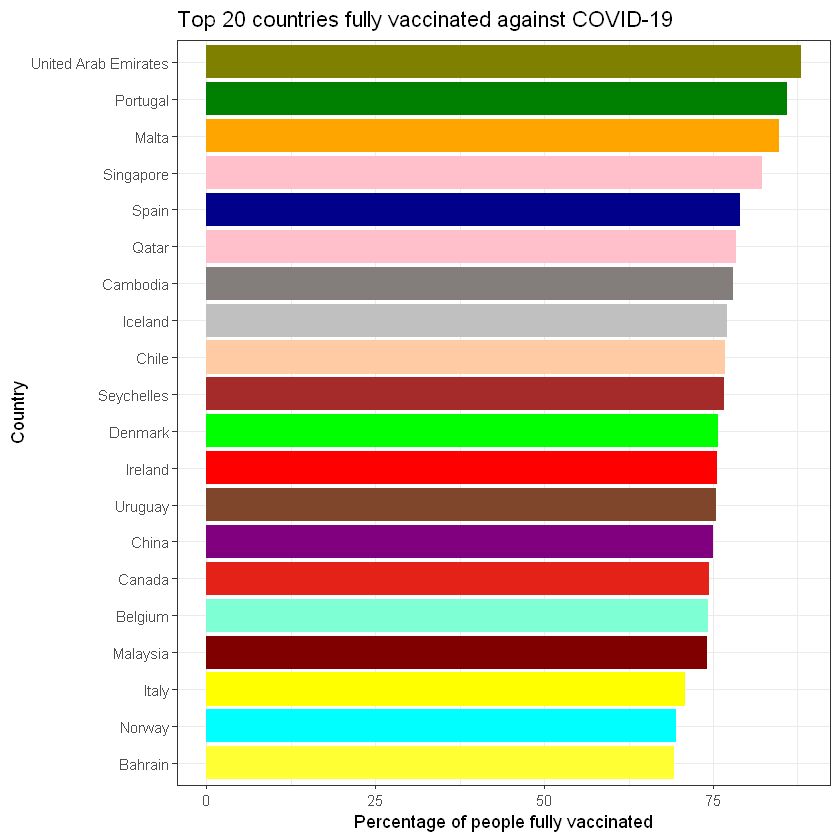

In [18]:
covid_data  %>%
    arrange(desc(percentage_fully_vaccinated)) %>%
    slice(1:20) %>%
    ggplot()+ 
    geom_bar(aes(x = reorder(country, percentage_fully_vaccinated), 
                y=percentage_fully_vaccinated,
                fill = country),
                show.legend = FALSE,
            stat="identity") +
    scale_fill_manual("Country", values=c("#FFFF33","#7FFFD4","#837E7C","#E42217","#FFCBA4",
                                          "#800080","#00FF00","#C0C0C0","#FF0000","#FFFF00",
                                          "#800000","#FFA500","#00FFFF","#008000","#FFC0CB",
                                          "#A52A2A","#FFC0CB","#00008B","#808000","#7F462C"))+
    coord_flip()+
    xlab("Country")+
    ylab("Percentage of people fully vaccinated") +
    ggtitle("Top 20 countries fully vaccinated against COVID-19")+
    theme_bw()
    


## Julia part (5 marks)

Reproduce (at least part) of the scraping workflow you have done in R using Julia.

**you will need to do this in a new, separated notebook or pluto notebook**

_hint_ this is the moment to go back to the Julia notebooks from the lab if you have not done them.